In [1]:
import sys
sys.path.append('../chromdyn')
from Topology import TopologyGenerator
from ChromatinDynamics import ChromatinDynamics
from Reporters import save_pdb

from HiCManager import HiCManager
hicman = HiCManager()

import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Initialize generator object
generator = TopologyGenerator()

#generate topology
generator.gen_top([100])

In [3]:
#Initialize simulation object
#output will be generated if not present
sim = ChromatinDynamics(generator.topology, name = 'test', platform_name = "OpenCL", output_dir = "output", console_stream = True)

2025-08-06 15:27:36,965 | INFO | ChromatinDynamics | ************************************************************
2025-08-06 15:27:36,966 | INFO | ChromatinDynamics |                      Chromatin Dynamics                     
2025-08-06 15:27:36,966 | INFO | ChromatinDynamics | ************************************************************
2025-08-06 15:27:36,967 | INFO | ChromatinDynamics | System initialized with 100 particles. Output directory: output
2025-08-06 15:27:36,967 | INFO | Platforms | Platform 'OpenCL' is available and selected.
2025-08-06 15:27:36,968 | INFO | ChromatinDynamics | force_field_manager initialized. Use this to add forces before running setup.


In [4]:
#Add forces
sim.force_field_manager.add_harmonic_bonds()
sim.force_field_manager.add_self_avoidance()
sim.force_field_manager.add_flat_bottom_harmonic()

2025-08-06 15:27:45,394 | INFO | Forcefield | Adding 99 harmonic bonds with r0=1.0, k=10.0, group=0
2025-08-06 15:27:45,396 | INFO | Forcefield | HarmonicBonds force successfully added to system.
2025-08-06 15:27:45,396 | INFO | Forcefield | --------------------------------------------------
2025-08-06 15:27:45,397 | INFO | Forcefield | Adding Self-avoidance force with parameters:
2025-08-06 15:27:45,398 | INFO | Forcefield | Ecut=4.0, k_rep=5.0, r_rep=1.0, cutoff=5.0, group=2
2025-08-06 15:27:45,398 | INFO | Forcefield | Added exclusions from bonded monomers.
2025-08-06 15:27:45,399 | INFO | Forcefield | SelfAvoidance force successfully added to system.
2025-08-06 15:27:45,399 | INFO | Forcefield | --------------------------------------------------
2025-08-06 15:27:45,400 | INFO | Forcefield | --------------------------------------------------
2025-08-06 15:27:45,400 | INFO | Forcefield | Adding Flat-Bottom Harmonic potential with parameters:
2025-08-06 15:27:45,401 | INFO | Forcefiel

In [5]:
#set up the simulation
sim.simulation_setup(
            init_struct='randomwalk',
            integrator='langevin',
            temperature=120.0,
            timestep=0.01,
            save_pos=True,
            save_energy=True,
            energy_report_interval=3_000,
            pos_report_interval=1000,              
            )

2025-08-06 15:28:06,093 | INFO | Integrators | Creating integrator ...
2025-08-06 15:28:06,094 | INFO | Integrators | LangevinIntegrator: temperatute=120.0 | friction=0.1 | timestep=0.01
2025-08-06 15:28:06,295 | INFO | ChromatinDynamics | Setting up simulation context...
2025-08-06 15:28:06,296 | INFO | Utilities | Random walk created. Position shape: (100, 3)
2025-08-06 15:28:06,298 | INFO | ChromatinDynamics | Simulation context initialized.
2025-08-06 15:28:06,298 | INFO | ChromatinDynamics | ------------------------------------------------------------------------------------------------------------------------
2025-08-06 15:28:06,298 | INFO | ChromatinDynamics | Index  Force Class                    Force Name           Group    Particles    Bonds        Exclusions   P.E./Particle       
2025-08-06 15:28:06,299 | INFO | ChromatinDynamics | ------------------------------------------------------------------------------------------------------------------------
2025-08-06 15:28:06,30

In [6]:
#collapse run
sim.run(10_000, report=False)

2025-08-06 15:29:07,502 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-08-06 15:29:07,503 | INFO | ChromatinDynamics | Running simulation for 10000 steps...
2025-08-06 15:29:07,503 | INFO | ChromatinDynamics | Paused reporter: position
2025-08-06 15:29:07,504 | INFO | ChromatinDynamics | Paused reporter: energy
2025-08-06 15:29:08,349 | INFO | ChromatinDynamics | Completed 10000 steps in 0.84s (11850 steps/s)
2025-08-06 15:29:08,349 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-08-06 15:29:08,350 | INFO | ChromatinDynamics | Resumed reporter: position
2025-08-06 15:29:08,350 | INFO | ChromatinDynamics | Resumed reporter: energy


In [7]:
# check the context
sim.print_force_info()

2025-08-06 15:29:21,442 | INFO | ChromatinDynamics | ------------------------------------------------------------------------------------------------------------------------
2025-08-06 15:29:21,443 | INFO | ChromatinDynamics | Index  Force Class                    Force Name           Group    Particles    Bonds        Exclusions   P.E./Particle       
2025-08-06 15:29:21,444 | INFO | ChromatinDynamics | ------------------------------------------------------------------------------------------------------------------------
2025-08-06 15:29:21,452 | INFO | ChromatinDynamics | 0      HarmonicBondForce              HarmonicBonds        0        N/A          99           N/A          0.799               
2025-08-06 15:29:21,454 | INFO | ChromatinDynamics | 1      CustomNonbondedForce           SelfAvoidance        2        100          N/A          99           0.100               
2025-08-06 15:29:21,456 | INFO | ChromatinDynamics | 2      CustomExternalForce            FlatBottomHarmonic

In [11]:
# save structures while running using reporters
sim.run(10_000, report=True)

2025-08-06 15:29:59,287 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-08-06 15:29:59,288 | INFO | ChromatinDynamics | Running simulation for 10000 steps...
2025-08-06 15:30:00,146 | INFO | ChromatinDynamics | Completed 10000 steps in 0.86s (11664 steps/s)
2025-08-06 15:30:00,146 | INFO | ChromatinDynamics | ------------------------------------------------------------


In [12]:
#optionally you may save pdbs of individual configs
save_pdb(sim)

In [13]:
#Simulations done -- save reports
sim.save_reports()

2025-08-06 15:30:15,713 | INFO | ChromatinDynamics | Closed position reporter file.


In [14]:
#Generating HiC from traj
hic = hicman.gen_hic_from_cndb(traj_file=sim.reporters.get('position').filename, mu=2.0, rc=2.0, p=4.0, parallel=True)
# np.savetxt(os.path.join(str(sim.output_dir), f"Pi_{str(replica)}.txt"), hic)

2025-08-06 15:30:54,421 | INFO | HiCManager | Loading trajectory ...
2025-08-06 15:30:54,435 | INFO | HiCManager | Trajectory shape: (40, 100, 3)
2025-08-06 15:30:54,441 | INFO | HiCManager | Using multiprocessing. Dividing into 5 processes.
2025-08-06 15:30:54,980 | INFO | HiCManager | Generated HiC matrix of shape: (100, 100)


/var/folders/73/qzvpd49j0zl9j489y2t2l2280000gn/T/ipykernel_49506/3529879410.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.matshow(np.log10(hic), cmap='Reds')


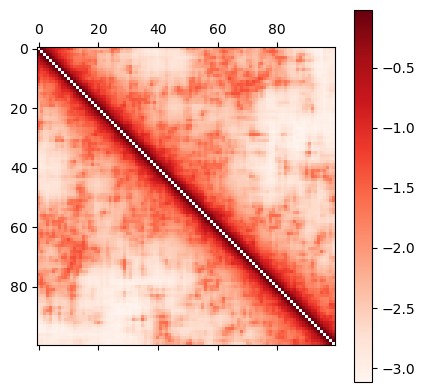

In [15]:
plt.matshow(np.log10(hic), cmap='Reds')
plt.colorbar()